In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/datasetnya/apaaa.csv')

In [4]:
df.head()

,label,postingan
0,sah,Tiba juga kita di Minggu ke-7 Hari pertama! Ja...
1,sah,Match besar masih berlanjut di Hari Kedua! Dib...
2,sah,Belajar langsung dengan pro player! Siapa mauu...
3,sah,Akhirnya kita sampai di Hari ketiga Minggu ke-...
4,sah,Hari gini ga punya squad/teman mabar? Mana lah...


In [5]:
df['label'].value_counts()

,count
label,
bad,88
sah,87


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df['postingan']
y = df['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string
import nltk
import spacy
!pip install nltk
!python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('indonesian')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 47.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Error loading indonesian: Package 'indonesian' not found
[nltk_data]     in index


False

Support Vector Machine

In [70]:
from sklearn.svm import SVC

In [11]:
def preprocess_text(text):
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc if not token.is_punct | token.is_stop]
    return lemmatized

In [59]:
text_clf_svc = Pipeline([('tfidf', TfidfVectorizer(tokenizer=preprocess_text)),
                     ('clf', SVC()),
])

In [13]:
text_clf_svc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function preprocess_text at 0x7e167cb3beb0>)),
                ('clf', SVC())])

In [14]:
y_pred_svc = text_clf_svc.predict(X_test)

In [15]:
print(metrics.classification_report(y_test,y_pred_svc))

              precision    recall  f1-score   support

         bad       1.00      0.94      0.97        31
         sah       0.93      1.00      0.96        27

    accuracy                           0.97        58
   macro avg       0.97      0.97      0.97        58
weighted avg       0.97      0.97      0.97        58



In [16]:
print(metrics.accuracy_score(y_test,y_pred_svc))

0.9655172413793104


Naive Bayes

In [17]:
from sklearn.naive_bayes import MultinomialNB

In [18]:
def remove_punct_and_stopwords(text):
    # Hapus tanda baca
    no_punct = "".join([c for c in text if c not in string.punctuation])

    # Tokenisasi teks
    tokens = word_tokenize(no_punct)

    # Akses stopwords bahasa Indonesia
    indonesian_stopwords = stopwords.words('indonesian')

    # Hapus stopwords dari token
    no_punct_and_no_stop = " ".join([word for word in tokens if word not in indonesian_stopwords])
    return no_punct_and_no_stop

In [19]:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer(preprocessor=remove_punct_and_stopwords)),
                        ('clf', MultinomialNB()),
   ])

In [20]:
text_clf_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(preprocessor=<function remove_punct_and_stopwords at 0x7e167a615480>)),
                ('clf', MultinomialNB())])

In [21]:
y_pred_nb = text_clf_nb.predict(X_test)

In [22]:
print(metrics.classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

         bad       0.94      0.97      0.95        31
         sah       0.96      0.93      0.94        27

    accuracy                           0.95        58
   macro avg       0.95      0.95      0.95        58
weighted avg       0.95      0.95      0.95        58



In [23]:
print(metrics.accuracy_score(y_test,y_pred_nb))

0.9482758620689655


Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
def preprocess_text(text):
    doc = nlp(text)
    lemmatized = [token.lemma_ for token in doc if not token.is_punct | token.is_stop]
    return lemmatized

In [26]:
text_clf_rf= Pipeline([('tfidf', TfidfVectorizer(tokenizer=preprocess_text)),
                     ('clf', RandomForestClassifier()),
])

In [27]:
text_clf_rf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Pipeline(steps=[('tfidf',
                 TfidfVectorizer(tokenizer=<function preprocess_text at 0x7e167a165a20>)),
                ('clf', RandomForestClassifier())])

In [28]:
y_pred = text_clf_rf.predict(X_test)

In [29]:
print(metrics.confusion_matrix(y_test,y_pred))

[[31  0]
 [ 2 25]]


In [30]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         bad       0.94      1.00      0.97        31
         sah       1.00      0.93      0.96        27

    accuracy                           0.97        58
   macro avg       0.97      0.96      0.97        58
weighted avg       0.97      0.97      0.97        58



In [31]:
print(metrics.accuracy_score(y_test,y_pred))

0.9655172413793104


Ensemble Model

In [32]:
from sklearn.ensemble import VotingClassifier

In [60]:
estimators = [('svc', text_clf_svc), ('rf', text_clf_rf), ('nb', text_clf_nb)]

In [61]:
ensemble_model = VotingClassifier(estimators=estimators, voting='hard')

In [62]:
ensemble_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


VotingClassifier(estimators=[('svc',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(tokenizer=<function preprocess_text at 0x7e167a165a20>)),
                                              ('clf', SVC())])),
                             ('rf',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(tokenizer=<function preprocess_text at 0x7e167a165a20>)),
                                              ('clf',
                                               RandomForestClassifier())])),
                             ('nb',
                              Pipeline(steps=[('tfidf',
                                               TfidfVectorizer(preprocessor=<function remove_punct_and_stopwords at 0x7e167a615480>)),
                                              ('clf', MultinomialNB())]))])

In [63]:
predictions = ensemble_model.predict(X_test)

In [66]:
print(metrics.classification_report(y_test, predictions))
print(metrics.accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

         bad       0.97      0.97      0.97        31
         sah       0.96      0.96      0.96        27

    accuracy                           0.97        58
   macro avg       0.97      0.97      0.97        58
weighted avg       0.97      0.97      0.97        58

0.9655172413793104


In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Hitung akurasi
accuracy = accuracy_score(y_test, predictions)
print(f"Akurasi: {accuracy}")

# Hitung precision, recall, dan F1-score (asumsikan label 'bad' sebagai positif)
precision = precision_score(y_test, predictions, pos_label='bad')
recall = recall_score(y_test, predictions, pos_label='bad')
f1 = f1_score(y_test, predictions, pos_label='bad')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Akurasi: 0.9482758620689655
Precision: 0.9375
Recall: 0.967741935483871
F1-score: 0.9523809523809523


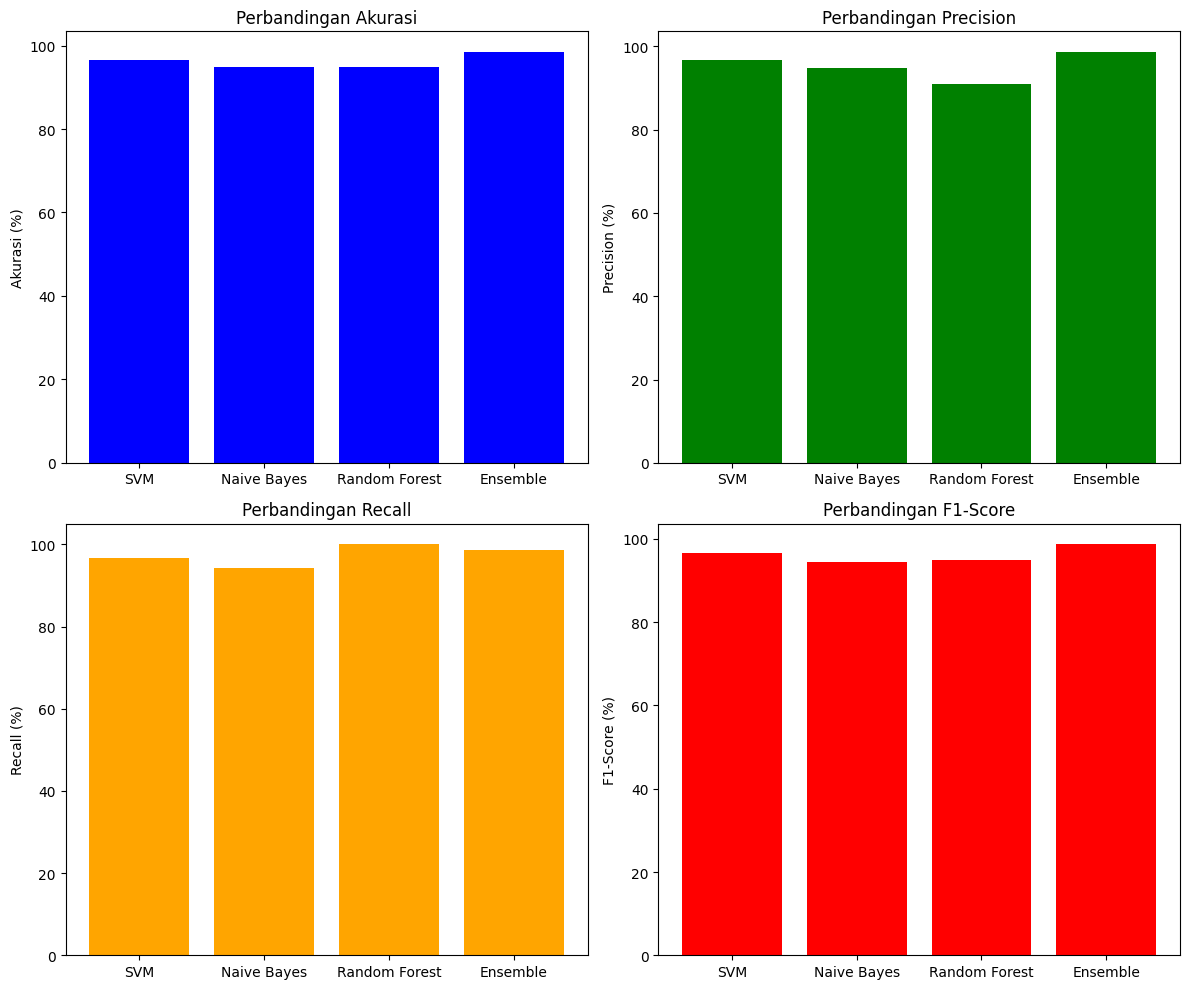

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk plotting
model = ['SVM', 'Naive Bayes', 'Random Forest', 'Ensemble']
akurasi = [96.5, 94.8, 94.8, 98.5]
precision = [96.7, 94.8, 91.0, 98.7]
recall = [96.7, 94.3, 100, 98.7]
f1_score = [96.7, 94.5, 95.0, 98.7]

# Membuat subplots
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

# Plot Akurasi
ax[0, 0].bar(model, akurasi, color='blue')
ax[0, 0].set_title('Perbandingan Akurasi')
ax[0, 0].set_ylabel('Akurasi (%)')

# Plot Precision
ax[0, 1].bar(model, precision, color='green')
ax[0, 1].set_title('Perbandingan Precision')
ax[0, 1].set_ylabel('Precision (%)')

# Plot Recall
ax[1, 0].bar(model, recall, color='orange')
ax[1, 0].set_title('Perbandingan Recall')
ax[1, 0].set_ylabel('Recall (%)')

# Plot F1-Score
ax[1, 1].bar(model, f1_score, color='red')
ax[1, 1].set_title('Perbandingan F1-Score')
ax[1, 1].set_ylabel('F1-Score (%)')

# Menyesuaikan layout
plt.tight_layout()

# Tampilkan plot
plt.show()
